<a href="https://colab.research.google.com/github/parrisatwork/Data-Predictions/blob/main/Pump_It_Up_Challenge_Parris_Trimingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pump It Up Challenge**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

## **Imports**

In [1]:
#Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style('white')
import pandas as pd
import numpy as np
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**


In [2]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/training_Set_values (Pump It Up).csv')

In [3]:
# Gathering parameters:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### Preliminary: Before we break open the following project, it is good to get a hypothesis about what is to come. This is being made prior to research.

1. Source of data:
https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/
2. Brief description of data: 
- "Can you predict which water pumps are faulty?
- Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania."

3. What is the target?
- to predict the operating condition of a waterpoint for each record in the dataset

4. What does one row represent? (A person?  A business?  An event? A product?)
- An object and its classification

5. Is this a classification or regression problem?
- Classification

6. How many features does the data have?
- 10

7. How many rows are in the dataset?
- 59,400

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- In cleaning, there are almost 60,000 rows, meaning there will be a lot of information that we do not require; and this will have to be adjusted or removed.

In [5]:
# Identify Columns
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

## **Clean Data**


### Delete Unnecessary Columns

In [6]:
# Drop columns
df.drop(columns=['installer','management_group', 'num_private', 'wpt_name', 
          'recorded_by', 'subvillage', 'scheme_name', 'region', 
          'quantity', 'water_quality', 'lga','ward', 'source_type', 'payment', 
          'waterpoint_type_group','extraction_type_group','extraction_type_class'], inplace=True)
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'basin', 'region_code', 'district_code',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management', 'payment_type',
       'quality_group', 'quantity_group', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object')

### Delete Duplicate Rows

In [7]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Identify and Addressed Missing Values

In [8]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 13902 missing values.


In [9]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
longitude               0
latitude                0
basin                   0
region_code             0
district_code           0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
quality_group           0
quantity_group          0
source                  0
source_class            0
waterpoint_type         0
dtype: int64

In [10]:
df.dropna(how='any', inplace=True)

In [11]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


### Identify and Correct Inconsistencies in Categorical Values

In [12]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,date_recorded,funder,basin,public_meeting,scheme_management,permit,extraction_type,management,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type
count,48689,48689,48689,48689,48689,48689,48689,48689,48689,48689,48689,48689,48689,48689
unique,324,1594,9,2,12,2,18,12,7,6,5,10,3,7
top,2011-03-15,Government Of Tanzania,Pangani,True,VWC,True,gravity,vwc,never pay,good,enough,spring,groundwater,communal standpipe
freq,498,8150,8540,44338,32717,33339,23182,33914,20800,42837,28475,14996,37170,23964


In [13]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'basin', 'region_code', 'district_code',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management', 'payment_type',
       'quality_group', 'quantity_group', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object')

### Univariate Visuals for the Target

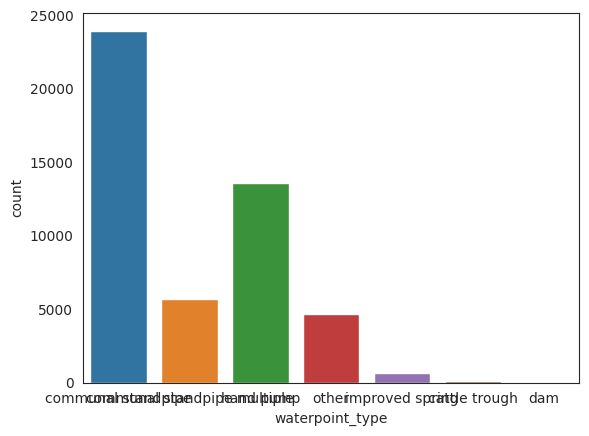

In [14]:
sns.countplot(df, x='waterpoint_type');

- The above chart shows that the Communial type is the highest.